<a href="https://colab.research.google.com/github/JeffersonEspinalA/Prueba/blob/main/ml_12_04_23_4_Naive_Bayes_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes  import GaussianNB

In [5]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


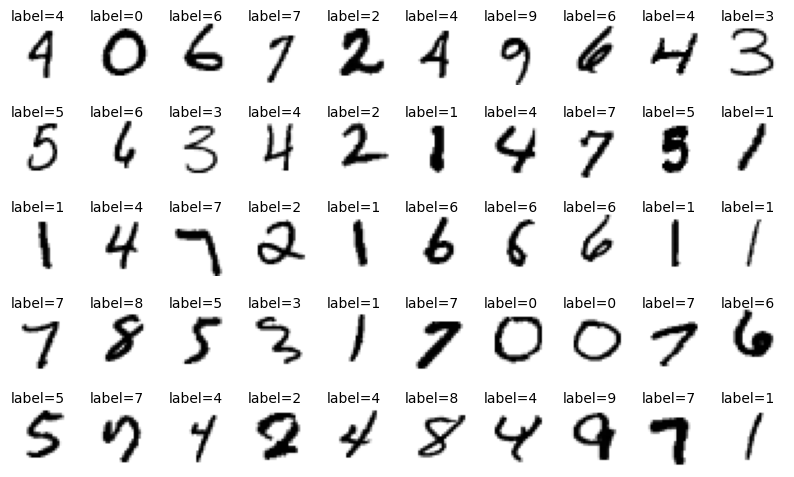

In [7]:
fig, axs = plt.subplots(5, 10, figsize=(10, 6))
for i in range(5):
    for j in range(10):
        idx = random.randint(0, 60000)
        axs[i, j].imshow(train_images[idx], cmap="gray_r")
        axs[i, j].axis("off")
        axs[i, j].text(0, 0, f"label={train_labels[idx]}")
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_images, test_images, train_labels, test_labels
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In [9]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

### Bias

In [10]:
acc_train = clf.score(X_train, y_train)
acc_train

0.5649

###Varianza

Test Accuracy

In [11]:
acc_val = clf.score(X_test, y_test)
acc_val

0.5558

In [12]:
(acc_val - acc_train) * 100

-0.9099999999999997

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=100)
pca.fit(X_train)

PCA(n_components=100)

In [15]:
pca.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001,
       0.0210919 , 0.02022991, 0.01715818, 0.01692111, 0.01578641,
       0.01482953, 0.01324561, 0.01276897, 0.01187263, 0.01152684,
       0.01066166, 0.01006713, 0.00953573, 0.00912544, 0.00883405,
       0.00839319, 0.00812579, 0.00786366, 0.00744733, 0.00690859,
       0.00658094, 0.00648148, 0.00602615, 0.00586582, 0.00570021,
       0.00543628, 0.00505786, 0.00487859, 0.00481429, 0.00472266,
       0.00456747, 0.00444836, 0.00418501, 0.00398215, 0.00384974,
       0.00375103, 0.00362008, 0.00351591, 0.00340057, 0.00321871,
       0.00319016, 0.00312804, 0.0029598 , 0.0028895 , 0.00284127,
       0.00271432, 0.00269517, 0.00258464, 0.00253764, 0.00244767,
       0.00240497, 0.00239247, 0.00230399, 0.00221476, 0.00213697,
       0.00207137, 0.00203004, 0.00196699, 0.00192796, 0.00188574,
       0.00186956, 0.00181012, 0.00177467, 0.00174827, 0.00165

In [16]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [17]:
clf = GaussianNB()
clf.fit(X_train_pca, y_train)

GaussianNB()

###Bias

In [18]:
acc_train = clf.score(X_train_pca, y_train)
acc_train

0.8701333333333333

###Varianza

Test Accuracy


In [19]:
acc_val = clf.score(X_test_pca, y_test)
acc_val

0.8786

In [20]:
(acc_val - acc_train) * 100

0.8466666666666733